In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [29]:
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.7.0


In [30]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [31]:
df_inputs = pd.DataFrame(inputs, columns = ['temp','rainfall','humidity'])
features = df_inputs.copy()
train_features = features[:10]
test_features = features[10:] 

df_targets = pd.DataFrame(targets, columns = ['apples'])
label = df_targets.copy()
train_label =  label[:10]
test_label = label[10:]

In [32]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
temp,84.400002,12.712199
rainfall,85.599998,32.031929
humidity,54.400002,13.175735


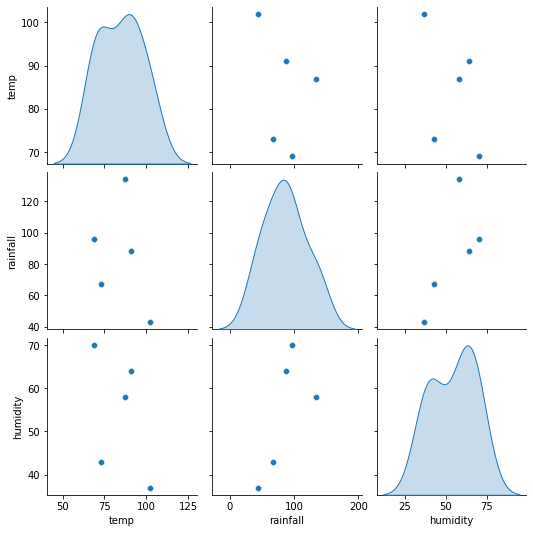

In [33]:
sns.pairplot(train_features[['temp', 'rainfall', 'humidity']], diag_kind='kde')

In [34]:
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing

In [35]:
temp = np.array(train_features['temp'])

temp_normalizer = preprocessing.Normalization(input_shape=[1, ], axis = None)
temp_normalizer.adapt(temp)

In [36]:
temp_linear_model = tf.keras.Sequential([
    temp_normalizer,
    layers.Dense(units=1)           
])

In [37]:
temp_linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss='mean_absolute_error')

In [38]:
%%time
history = temp_linear_model.fit(
    train_features['temp'], train_label,
    epochs = 1000,
    # suppress logging
    verbose = 0,
    # Calculate validation results on 10% of the training data
    validation_split = 0.3)

Wall time: 26.2 s


In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,val_loss,epoch
990,27.708231,47.937687,990
991,27.702206,47.951096,991
992,27.696123,47.966080,992
993,27.689989,47.982487,993
994,27.683817,48.000172,994
995,27.677597,48.019024,995
996,27.671343,48.038910,996
997,27.665052,48.059742,997
998,27.658735,48.081421,998
999,27.652386,48.103870,999


In [40]:
test_results = {}
test_results['temp_linear_model'] = temp_linear_model.evaluate(
    test_features['temp'],
    test_label, verbose=0)

In [41]:
test_results['temp_linear_model']

33.78336715698242

In [42]:
y = temp_linear_model.predict(test_features['temp'])
y


array([[56.105095],
       [56.499866],
       [56.41214 ],
       [56.74112 ],
       [56.01737 ]], dtype=float32)

In [43]:
norm_test_features = np.linalg.norm(test_features['temp'])
norm_train_features = np.linalg.norm(train_features['temp'])
# norm_test_label = np.linalg.norm(test_label['temp'])
norm_train_label = np.linalg.norm(train_label['apples'])


normal_array_test_features = test_features['temp']/norm_test_features
normal_array_train_features = train_features['temp']/norm_train_features
normal_array_train_label = train_label['apples']/norm_train_label

print(normal_array_train_features)
print(normal_array_test_features)
print(normal_array_train_label)

0    0.270764
1    0.337528
2    0.322692
3    0.378328
4    0.255928
5    0.270764
6    0.337528
7    0.322692
8    0.378328
9    0.255928
Name: temp, dtype: float32
10    0.382919
11    0.477337
12    0.456355
13    0.535037
14    0.361937
Name: temp, dtype: float32
0    0.211808
1    0.306366
2    0.450093
3    0.083210
4    0.389576
5    0.211808
6    0.306366
7    0.450093
8    0.083210
9    0.389576
Name: apples, dtype: float32


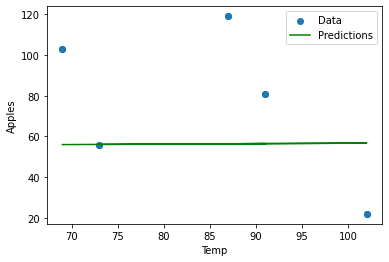

In [44]:
def plot_Apples(x, y):
  plt.scatter(train_features['temp'], train_label['apples'], label = 'Data')
  plt.plot(x, y, color='g', label = 'Predictions')
  plt.xlabel('Temp')
  plt.ylabel('Apples')
  plt.legend()
  
plot_Apples(test_features['temp'], y)

In [45]:
normalizer = preprocessing.Normalization(axis = -1)

In [46]:
normalizer.adapt(np.array(train_features))

In [47]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [48]:
linear_model.predict(train_features[:9])

array([[ 1.4295608],
       [-0.6296491],
       [-2.0002978],
       [ 1.7456362],
       [-0.5452498],
       [ 1.4295608],
       [-0.6296491],
       [-2.0002978],
       [ 1.7456362]], dtype=float32)

In [49]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate = 0.1),
    loss='mean_absolute_error')

In [26]:
%%time
history = linear_model.fit(
    train_features, train_label, 
    epochs = 1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 23.5 s


In [27]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_label, verbose = 0)
test_results['linear_model']

0.8979339599609375